# Group Writeup
### Anzhelika Belozerova (238852),
### Isabella Urbano-Trujillo (233239),
### Camilo Pedraza Jimenez (226679),
### Luis Fernando Ramirez Ruiz (222819),
### Milton Mier (223594)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Context 

What is the context? Refine the setup you proposed in the project memo and explain it in a paragraph.

## 2. EDA

What are some of the most important patterns in your data that you can observe through exploratory data analysis? For instance, what does the label look like? What do the simple bivariate relationships in the data look like? Will this affect any of your modeling choices

In [56]:
df = pd.read_csv('/Users/isdc/Library/CloudStorage/OneDrive-HertieSchool/2024-1/Machine Learning/ML project/machine_learning/all_features_merged.csv')

In [57]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [58]:
print(df)

              Date Country  Solar  Wind Onshore  Wind Offshore  \
0              NaT      GB    0.0       4546.00         3165.0   
1              NaT      AT    0.0        117.25            NaN   
2              NaT      BE    0.0        246.00          420.0   
3              NaT      CH    0.0          4.00            NaN   
4              NaT      CZ    0.0           NaN            NaN   
...            ...     ...    ...           ...            ...   
5551058 2023-12-31    SE_2    NaN           NaN            NaN   
5551059 2023-12-31    SE_3    NaN           NaN            NaN   
5551060 2023-12-31    SE_4    NaN           NaN            NaN   
5551061 2023-12-31      SI    NaN           NaN            NaN   
5551062 2023-12-31      SK    NaN           NaN            NaN   

         water_reservoirs_and_hydro_storage  energy_price  biomass  gas  \
0                                       NaN           NaN      NaN  NaN   
1                                       NaN           NaN

In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5551063 entries, 0 to 5551062
Data columns (total 10 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   Date                                datetime64[ns]
 1   Country                             object        
 2   Solar                               float64       
 3   Wind Onshore                        float64       
 4   Wind Offshore                       float64       
 5   water_reservoirs_and_hydro_storage  float64       
 6   energy_price                        float64       
 7   biomass                             float64       
 8   gas                                 float64       
 9   nuclear                             float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 423.5+ MB
None


In [60]:
print(df.describe())

                                Date         Solar  Wind Onshore  \
count                        3575052  1.694963e+06  1.895443e+06   
mean   2019-05-09 08:05:52.310511616  3.768433e+02  8.095530e+02   
min              2014-12-31 23:00:00  0.000000e+00  0.000000e+00   
25%              2017-01-29 11:00:00  0.000000e+00  3.200000e+01   
50%              2019-03-29 18:00:00  0.000000e+00  1.710000e+02   
75%              2021-08-10 16:00:00  1.932500e+02  7.050000e+02   
max              2023-12-31 00:00:00  1.702500e+04  2.015600e+04   
std                              NaN  1.153057e+03  1.751954e+03   

       Wind Offshore  water_reservoirs_and_hydro_storage  energy_price  \
count  591053.000000                        1.196200e+04  3.371340e+06   
mean      476.024976                        3.589091e+06  7.913296e+01   
min         0.000000                        0.000000e+00 -5.000000e+02   
25%         0.000000                        3.045920e+05  3.237000e+01   
50%        91.000

In [61]:
print(df.isnull().sum())

Date                                  1976011
Country                                     0
Solar                                 3856100
Wind Onshore                          3655620
Wind Offshore                         4960010
water_reservoirs_and_hydro_storage    5539101
energy_price                          2179723
biomass                               3528735
gas                                   3324045
nuclear                               4730153
dtype: int64


### What does the label look like?

In [62]:
df['Year'] = df['Date'].dt.year
annual_avg_price = df.groupby(['Country', 'Year'])['energy_price'].mean().reset_index()
pivot_table = annual_avg_price.pivot(index='Year', columns='Country', values='energy_price')

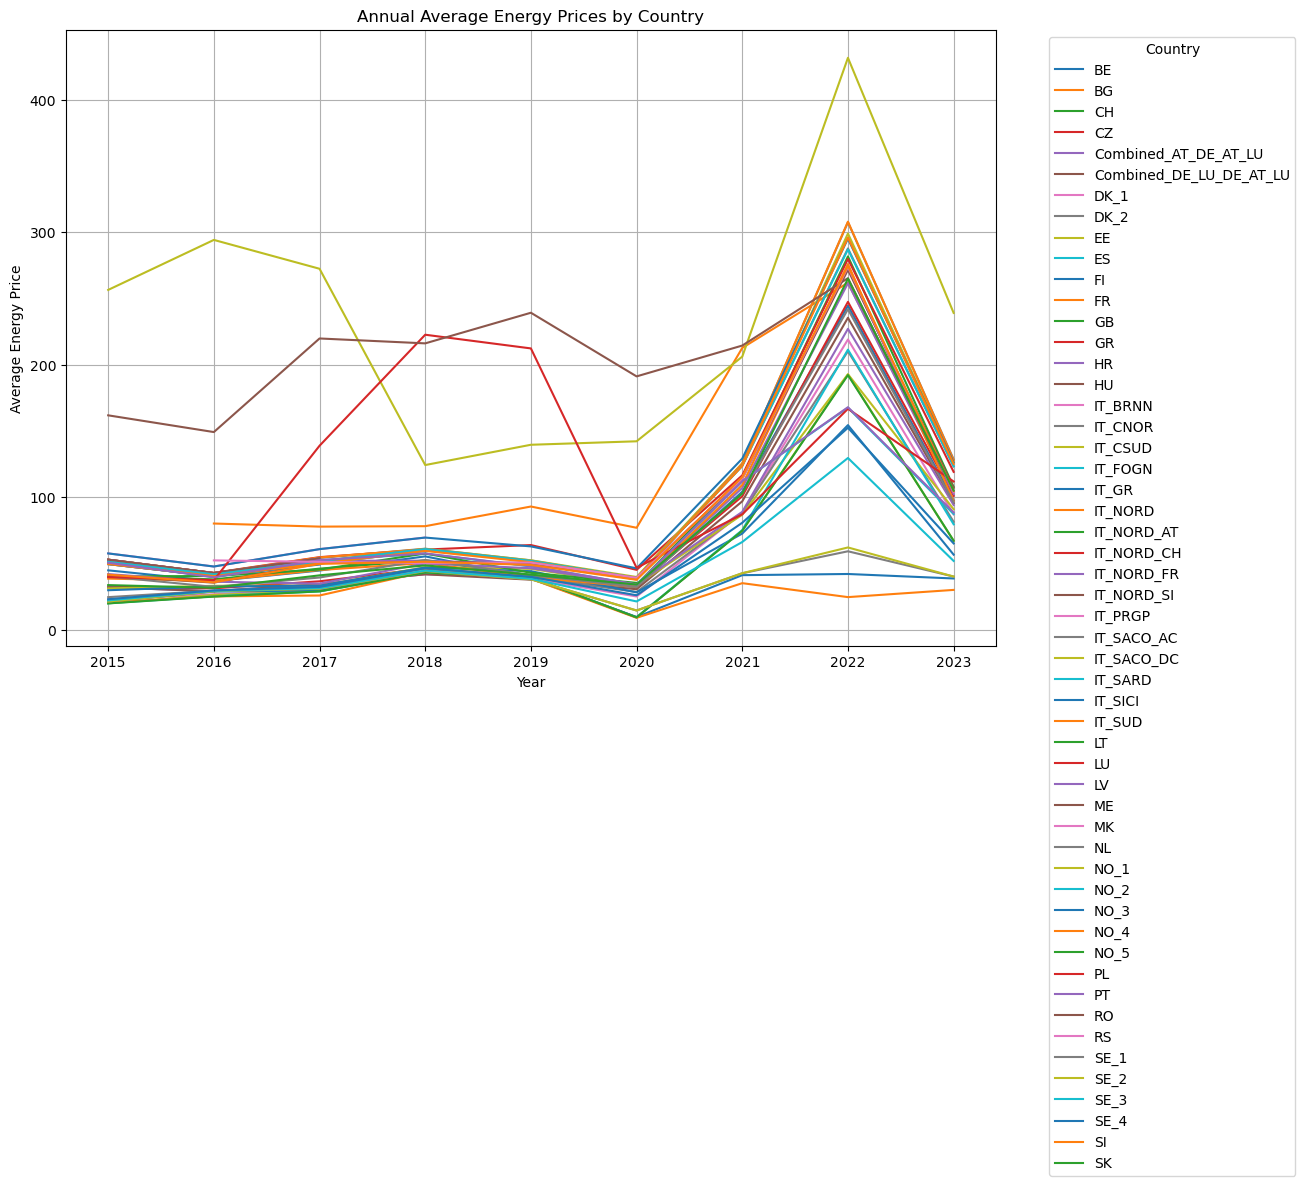

In [63]:
plt.figure(figsize=(12, 8))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='', label=column)

plt.title('Annual Average Energy Prices by Country')
plt.xlabel('Year')
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [64]:
df_2019 = df[df['Year'] == 2019]
df_2019['Month'] = df_2019['Date'].dt.month
monthly_avg_price_2019 = df_2019.groupby(['Country', 'Month'])['energy_price'].mean().reset_index()
pivot_table_2019 = monthly_avg_price_2019.pivot(index='Month', columns='Country', values='energy_price')

/var/folders/pg/y2y18dgn2sd7c3s0cf9mx1gr0000gn/T/ipykernel_64743/1103834199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Month'] = df_2019['Date'].dt.month


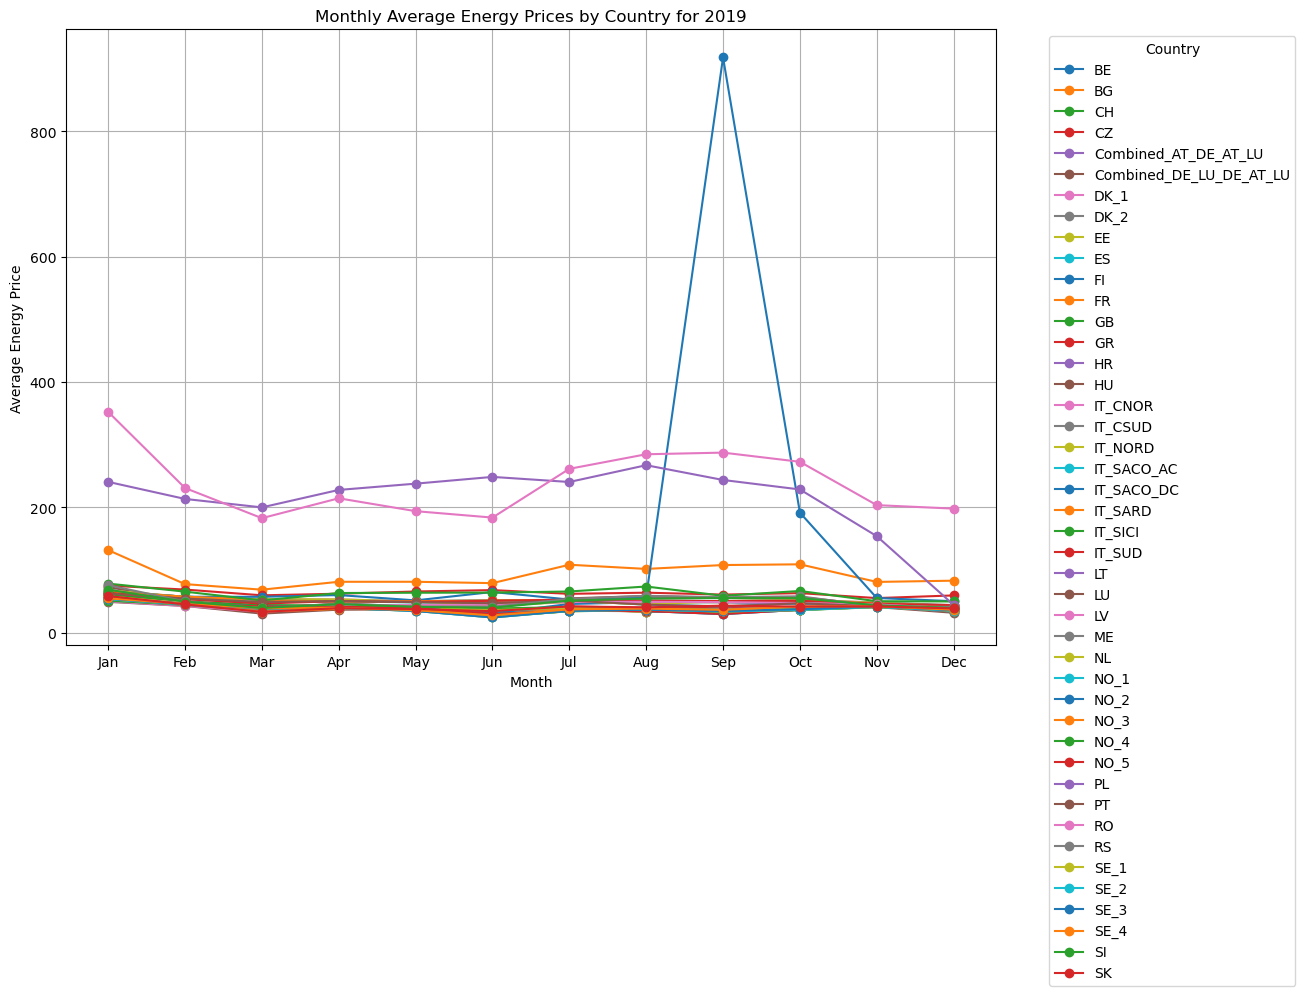

In [65]:
plt.figure(figsize=(12, 8))
for column in pivot_table_2019.columns:
    plt.plot(pivot_table_2019.index, pivot_table_2019[column], marker='o', label=column)

plt.title('Monthly Average Energy Prices by Country for 2019')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [66]:
df_2022 = df[df['Year'] == 2022]
df_2022['Month'] = df_2022['Date'].dt.month
monthly_avg_price_2022 = df_2022.groupby(['Country', 'Month'])['energy_price'].mean().reset_index()
pivot_table_2022 = monthly_avg_price_2022.pivot(index='Month', columns='Country', values='energy_price')

/var/folders/pg/y2y18dgn2sd7c3s0cf9mx1gr0000gn/T/ipykernel_64743/974007566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Month'] = df_2022['Date'].dt.month


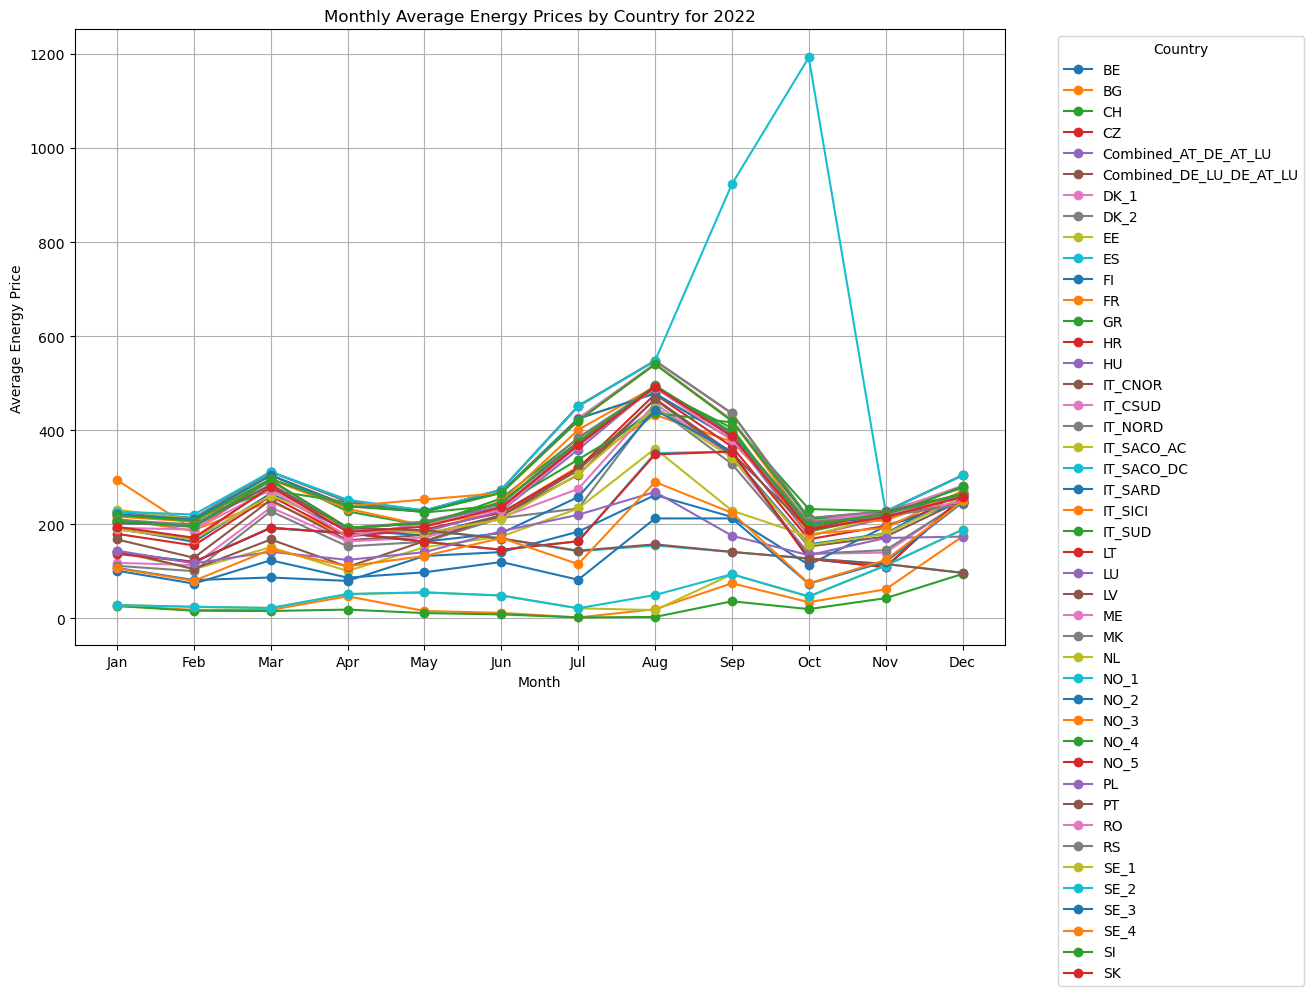

In [67]:
plt.figure(figsize=(12, 8))
for column in pivot_table_2022.columns:
    plt.plot(pivot_table_2022.index, pivot_table_2022[column], marker='o', label=column)

plt.title('Monthly Average Energy Prices by Country for 2022')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [68]:
df_2023 = df[df['Year'] == 2023]
df_2023['Month'] = df_2023['Date'].dt.month
monthly_avg_price_2023 = df_2023.groupby(['Country', 'Month'])['energy_price'].mean().reset_index()
pivot_table_2023 = monthly_avg_price_2023.pivot(index='Month', columns='Country', values='energy_price')

/var/folders/pg/y2y18dgn2sd7c3s0cf9mx1gr0000gn/T/ipykernel_64743/1737050733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Month'] = df_2023['Date'].dt.month


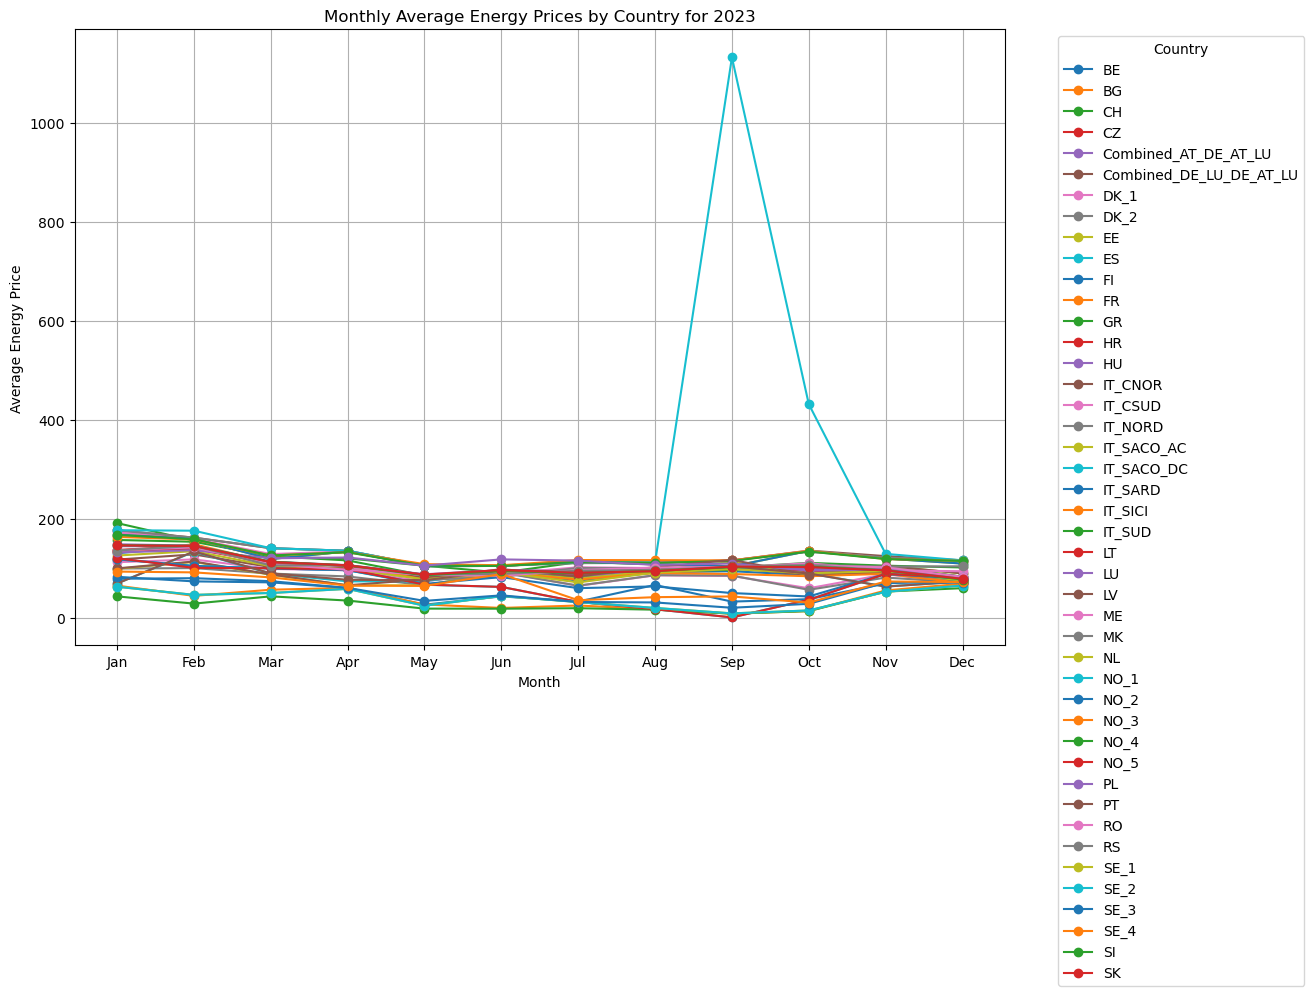

In [69]:
plt.figure(figsize=(12, 8))
for column in pivot_table_2023.columns:
    plt.plot(pivot_table_2023.index, pivot_table_2023[column], marker='o', label=column)

plt.title('Monthly Average Energy Prices by Country for 2023')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Time series analysis

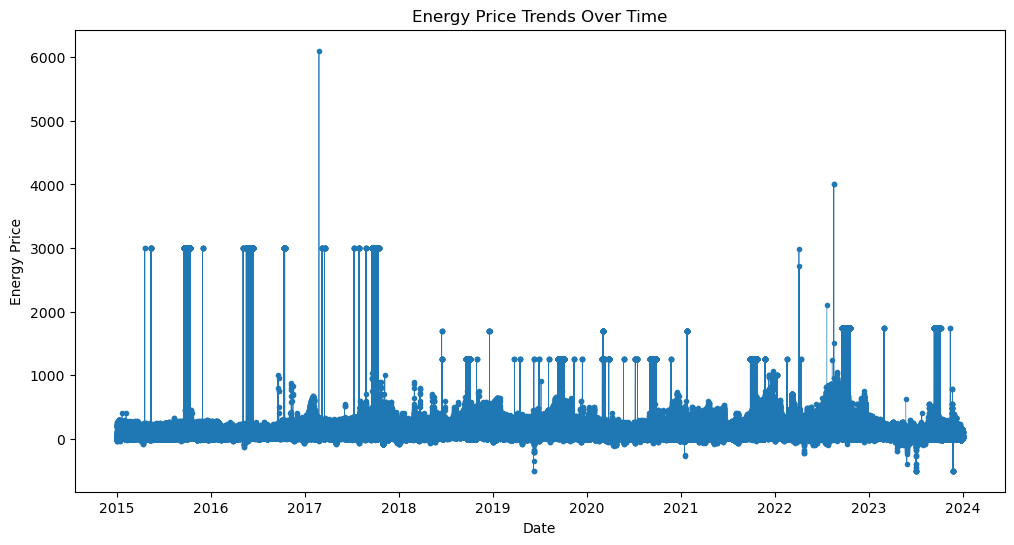

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['energy_price'], marker='.', linestyle='-', linewidth=0.5)
plt.title('Energy Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show()


### Correlation analysis

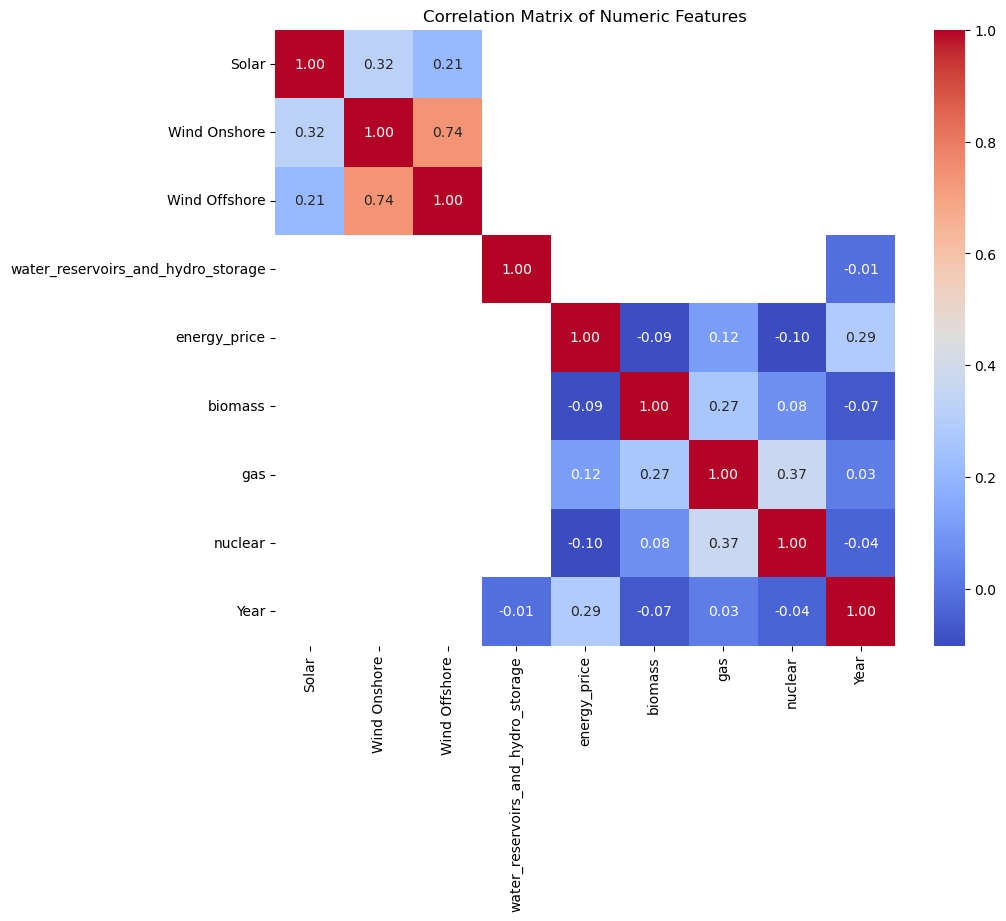

In [71]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


We dropped the Wind vars because of correlation

### Exploring relationship

In [77]:
df_2000 = df[df['energy_price'] <= 2000] # because after 2000 there are outliers

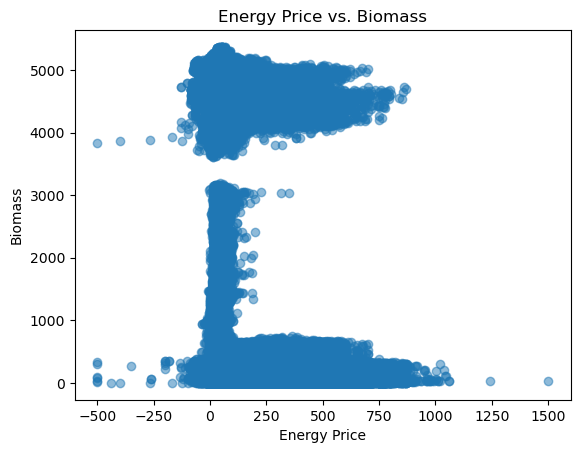

In [78]:
# Relationship target and biomass
plt.scatter(df_2000['energy_price'], df_2000['biomass'], alpha=0.5)
plt.title('Energy Price vs. Biomass')
plt.xlabel('Energy Price')
plt.ylabel('Biomass')
plt.show()

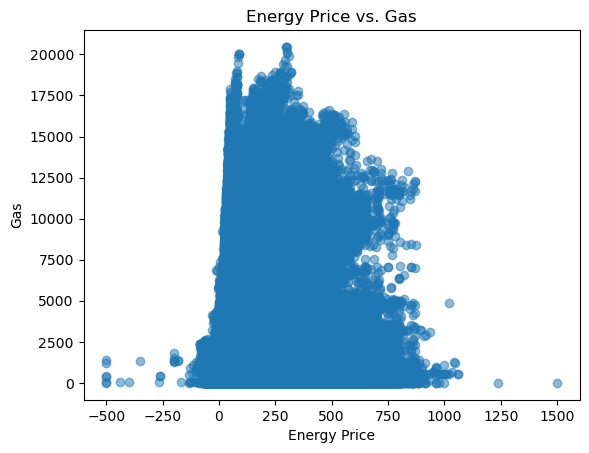

In [79]:
# Relationship target and gas
plt.scatter(df_2000['energy_price'], df_2000['gas'], alpha=0.5)
plt.title('Energy Price vs. Gas')
plt.xlabel('Energy Price')
plt.ylabel('Gas')
plt.show()

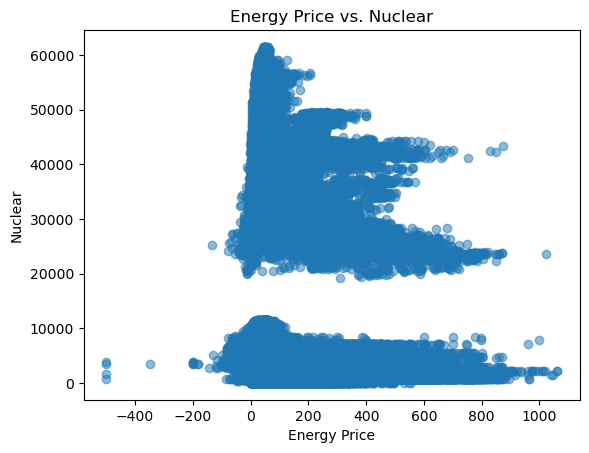

In [80]:
# Relationship target and nuclear
plt.scatter(df_2000['energy_price'], df_2000['nuclear'], alpha=0.5)
plt.title('Energy Price vs. Nuclear')
plt.xlabel('Energy Price')
plt.ylabel('Nuclear')
plt.show()

## 3. Models

What models did you try? How did they perform? I will want to see charts comparing the performance of a few different models. I will also want to see an exploration of which features should be included and proved to be particularly useful.

## 4. Evaluation

How are you doing evaluation of your models? What is your test set? How did you choose it? How are you doing cross-validation or, more generally, choosing hyperparameters?

## 5. Choice of model

The final part of the writeup should be an argument for which model you believe best satisfies the needs of the context. You should buttress this argument with the charts and diagnostics you have prepared. This doesn’t necessarily mean the model with the lowest overall error! It’s entirely plausible that concerns such as fairness or explainability might be important considerations to you, in which case you should discuss the tradeoffs you have measured on these dimensions. Crucially, however, your determination should be backed by evidence.